# Desafio Discorama 

#### Ideias Iniciais

A empresa chama-se Discorama tem como objetivo amadurecer na sua cultura do uso de dados por meio de melhor organização e escolha de ferramentas de análise de dados para que aumente o ticket médio e dimuninuindo o atraso médio na devolução de filmes. 

# Entregas

O objetivo aqui é de fazer uma análise exploratória que dê base a futuras soluções de negócios que visam o aumento do ticket médio e redução do atraso na devolução dos filmes. O foco foi explorar os dados entendê-los melhor.

# Sumário
#### 1. Análise Exploratória
     A. Sobre o Consumidor:
        * Consumo total de cada cliente no período; 
        * Top 100 consumidores do período; 
        * Ticket médio por gênero; 
        * Clientes com cadastros inativos; 
        * Gêneros de filmes mais procurados; 
#### 2. Insights retirados dos dados
        * Recuperação de clientes inativos;
        * Investimento em gêneros com maiores;
        * Explorar mercados aquecidos;
        * Diminuição do tempo de atraso


# Análise Exploratória

O foco deve sempre ser em torno de aumentar o ticket médio e reduzir o atraso médio na devolução dos filmes. Para aumentar o ticket médio o cliente deve gastar mais a cada compra. A pergunta é: porque ao invés de gastar
- Identicar qual tabela possui dados sobre alugueis de filme que contenham datas de empréstimo e devolução;


In [4]:
#Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Importando Data Sets
df_customer = pd.read_csv("C:/Users/toazz/Downloads/discorama/customer.csv", sep = ',', decimal = '.', encoding = 'latin')
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  599 non-null    int64 
 1   store_id     599 non-null    int64 
 2   first_name   599 non-null    object
 3   last_name    599 non-null    object
 4   email        599 non-null    object
 5   address_id   599 non-null    int64 
 6   activebool   599 non-null    bool  
 7   create_date  599 non-null    object
 8   last_update  599 non-null    object
 9   active       599 non-null    int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 42.8+ KB


In [6]:
df_customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1


In [8]:
#Tratamento Dtype colunas
df_customer['create_date'] = pd.to_datetime(df_customer.create_date)
df_customer['last_upadte'] = pd.to_datetime(df_customer.last_update)

# Quanto cada pessoa já gastou?


- Racicínio: Somatório de todas as compras feitas por cada "costumer_id";
- Quais são os usuários que realmente são relevantes para o negócio? Existem clientes que gastam mais. Clientes que estão com cadastro ativos mas nunca realizaram compras? Normalmente quantos filmes são alugados por compra?


In [9]:
#Importando DataSet Payment
df_payment = pd.read_csv("C:/Users/toazz/Downloads/discorama/payment.csv", sep = ',', decimal = '.', encoding = 'latin')
df_payment['payment_date'] = pd.to_datetime(df_payment.payment_date)
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   payment_id    14596 non-null  int64         
 1   customer_id   14596 non-null  int64         
 2   staff_id      14596 non-null  int64         
 3   rental_id     14596 non-null  int64         
 4   amount        14596 non-null  float64       
 5   payment_date  14596 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 684.3 KB


In [10]:
#Agrupando por "Customer_id" para que saibamos quanto cada cliente já gastou.
df_payment_customer_id = df_payment.groupby(['customer_id'])['amount'].sum()
df_payment_customer_id.nlargest()

customer_id
148    211.55
526    208.58
178    194.61
137    191.62
144    189.60
Name: amount, dtype: float64

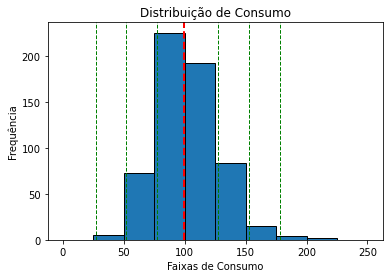

In [11]:
#Plotar a distribuição de consumos 

for i in range(1, 4):
    plt.axvline(np.mean(df_payment_customer_id) + i * np.std(df_payment_customer_id), color='green', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(df_payment_customer_id) - i * np.std(df_payment_customer_id), color='green', linestyle='dashed', linewidth=1)


faixas_de_consumo = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
plt.hist(df_payment_customer_id, bins=faixas_de_consumo, edgecolor='black')
plt.axvline(np.median(df_payment_customer_id), color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Faixas de Consumo')
plt.ylabel('Frequência')
plt.title('Distribuição de Consumo')
plt.show()





Percebemos que 99,7% de todas os clientes possuem um total de consumo entre 25 a 175 dólares, com uma medianda de consumo em 100 dólares aproximadamente.

# Quais são os 100 clientes que mais consumiram?

O objetivo aqui é criar uma lista dos clientes mais importantes para a empresa. Como temos relativamente poucos clientes (600), é importante manter relacionamento com aqueles que são mais frequentes. Sabendo quem são eles podemos criar campan

In [12]:
top_100_clientes = df_payment_customer_id.nlargest(100)
top_100_clientes_id =  top_100_clientes.index.tolist()
top_100_clientes_id #Lembrando que a lista está em ordem descrente



[148,
 526,
 178,
 137,
 144,
 459,
 181,
 410,
 236,
 403,
 522,
 469,
 470,
 373,
 259,
 468,
 462,
 372,
 187,
 550,
 176,
 532,
 75,
 209,
 21,
 26,
 86,
 211,
 346,
 366,
 50,
 360,
 348,
 513,
 454,
 347,
 390,
 267,
 257,
 39,
 78,
 362,
 363,
 119,
 368,
 66,
 237,
 29,
 87,
 80,
 439,
 558,
 494,
 576,
 591,
 467,
 479,
 120,
 210,
 204,
 15,
 5,
 349,
 404,
 172,
 197,
 265,
 533,
 380,
 472,
 13,
 46,
 125,
 3,
 7,
 273,
 502,
 342,
 566,
 112,
 560,
 102,
 168,
 484,
 103,
 242,
 84,
 196,
 221,
 448,
 141,
 520,
 38,
 200,
 146,
 206,
 436,
 108,
 114,
 426]

# Ticket Médio por Gênero

Sendo o ticket édio o Somatório dos valores de todos os alugueis por gênero dividido pelo número de aluguéis feitos. A ideia é
concatenar as quase todas as tabelas de forma lógica e sequencial para que sabendo o "rental_id" (da tabela "Payment") descobrimos quanto cada categoria faturou no período.


In [13]:
df_payment

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996
...,...,...,...,...,...,...
14591,32094,245,2,12682,2.99,2007-05-14 13:44:29.996
14592,32095,251,1,14107,0.99,2007-05-14 13:44:29.996
14593,32096,252,2,13756,4.99,2007-05-14 13:44:29.996
14594,32097,263,1,15293,0.99,2007-05-14 13:44:29.996


In [14]:
#Importando os datasets necessários
df_rental = pd.read_csv("C:/Users/toazz/Downloads/discorama/rental.csv", sep = ',', decimal = '.', encoding = 'latin')
df_inventory = pd.read_csv("C:/Users/toazz/Downloads/discorama/inventory.csv", sep = ',', decimal = '.', encoding = 'latin')
df_film_category = pd.read_csv("C:/Users/toazz/Downloads/discorama/film_category.csv", sep = ',', decimal = '.', encoding = 'latin')
df_category= pd.read_csv("C:/Users/toazz/Downloads/discorama/category.csv", sep = ',', decimal = '.', encoding = 'latin')




In [15]:
#Concatenando as tabelas
df_merged = pd.merge(df_payment, df_rental, on = 'rental_id')
df_merged = pd.merge(df_merged, df_inventory, on = 'inventory_id')
df_merged = pd.merge(df_merged, df_film_category, on = 'film_id')
df_merged = pd.merge(df_merged, df_category, on = 'category_id')
df_merged.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 14596 entries, 0 to 14595
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   payment_id     14596 non-null  int64         
 1   customer_id_x  14596 non-null  int64         
 2   staff_id_x     14596 non-null  int64         
 3   rental_id      14596 non-null  int64         
 4   amount         14596 non-null  float64       
 5   payment_date   14596 non-null  datetime64[ns]
 6   rental_date    14596 non-null  object        
 7   inventory_id   14596 non-null  int64         
 8   customer_id_y  14596 non-null  int64         
 9   return_date    14413 non-null  object        
 10  staff_id_y     14596 non-null  int64         
 11  last_update_x  14596 non-null  object        
 12  film_id        14596 non-null  int64         
 13  store_id       14596 non-null  int64         
 14  last_update_y  14596 non-null  object        
 15  category_id    1459

C:\Users\toazz\AppData\Local\Temp\ipykernel_23532\2626745523.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'last_update_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged = pd.merge(df_merged, df_category, on = 'category_id')


In [86]:
df_merged_amount

Sports         4892.19
Sci-Fi         4336.01
Animation      4245.31
Drama          4118.46
Comedy         4002.48
New            3966.38
Action         3951.84
Foreign        3934.47
Games          3922.18
Family         3830.15
Documentary    3749.65
Horror         3401.27
Classics       3353.38
Children       3309.39
Travel         3227.36
Music          3071.52
Name: amount, dtype: float64

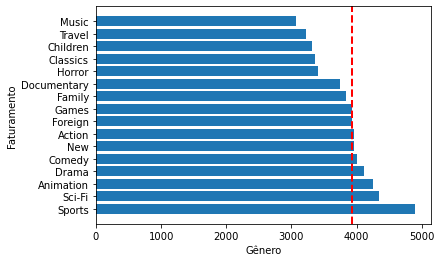

In [17]:
#Apresentando graficamente
df_merged_amount = df_merged_amount.sort_values(ascending = False)
plt.barh(df_merged_amount.index, df_merged_amount)
plt.axvline(np.median(df_merged_amount), color='red', linestyle='dashed', linewidth=2)
plt.ylabel('Faturamento')
plt.xlabel('Gênero')
plt.show()

Observamos que temos Sports despontando na frente com pouco menos de 2000 dólares de faturamento de diferença em relação ao último. Poderíamos checar se estamos planejando comprar uma leva de filmes que se enquadram no top5 com menos faturamento e investir em exemplares de gêneros que possuem mais procura e que possam estar até em falta.


In [18]:
df_customer.active.count()

599

In [19]:
df_customer.active.sum()

584

Vemos que há uma diferença entre a contagem das linhas da coluna "Active" e o somatório dos valores em cada linha, sendo "1" sendo considerado ativo e zero inativo. Portanto, temos 35 usuários inativos. Queremos saber quem são eles:

# Listando os clientes inativos

In [20]:
#Listando os clientes inativos 
usuarios_inativos = df_customer.loc[df_customer['active'] == 0]
usuarios_inativos.index.tolist()

[16, 64, 124, 169, 241, 271, 315, 368, 406, 446, 482, 510, 533, 557, 591]

Sabemos agora quem são os clientes que não estão mais tidos como ativos, e podemos tomar decisões de entrar em contato para sabermos o porquê de não serem mais consumidores, tentando fazê-los retornarem a consumidor por meio de campanhas promocionais, por exemplo.



# Distância média entre os clientes e as lojas

In [21]:
#importando os datasets necessários
df_address = pd.read_csv("C:/Users/toazz/Downloads/discorama/address.csv", sep = ',', decimal = '.', encoding = 'latin')
df_payment.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996


In [22]:
df_customer

,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active,last_upadte
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738
...,...,...,...,...,...,...,...,...,...,...,...
594,595,1,Terrence,Gunderson,terrence.gunderson@sakilacustomer.org,601,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738
595,596,1,Enrique,Forsythe,enrique.forsythe@sakilacustomer.org,602,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738
596,597,1,Freddie,Duggan,freddie.duggan@sakilacustomer.org,603,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738
597,598,1,Wade,Delvalle,wade.delvalle@sakilacustomer.org,604,True,2006-02-14,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738


In [23]:
df_address.head()

,address_id,address,address2,district,city_id,postal_code,phone,last_update
0,1,47 MySakila Drive,NaN,Alberta,300,NaN,NaN,2006-02-15 09:45:30.000
1,2,28 MySQL Boulevard,NaN,QLD,576,NaN,NaN,2006-02-15 09:45:30.000
2,3,23 Workhaven Lane,NaN,Alberta,300,NaN,1.403334e+10,2006-02-15 09:45:30.000
3,4,1411 Lillydale Drive,NaN,QLD,576,NaN,6.172236e+09,2006-02-15 09:45:30.000
4,5,1913 Hanoi Way,NaN,Nagasaki,463,35200.0,2.830338e+10,2006-02-15 09:45:30.000


A ideia é que façamos um link entre as tabelas para que no fim tenhamos acesso ao endereço do cliente baseado em seu "payment_id". Assim, poderemos rastrear o faturamento por cidade, estado e país.

In [24]:
df_merged2 = pd.merge(df_payment, df_customer, on = 'customer_id')
df_merged2= pd.merge(df_merged2, df_address, on = 'address_id')
df_merged2.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,store_id,first_name,last_name,email,...,last_update_x,active,last_upadte,address,address2,district,city_id,postal_code,phone,last_update_y
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000


In [25]:
df_merged2.city_id.sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# Tempo Médio que um filme passa alugado

In [28]:
df_rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,2,2005-05-24 22:54:33.000,1525,459,2005-05-28 19:40:33.000,1,2006-02-16 02:30:53.000
1,3,2005-05-24 23:03:39.000,1711,408,2005-06-01 22:12:39.000,1,2006-02-16 02:30:53.000
2,4,2005-05-24 23:04:41.000,2452,333,2005-06-03 01:43:41.000,2,2006-02-16 02:30:53.000
3,5,2005-05-24 23:05:21.000,2079,222,2005-06-02 04:33:21.000,1,2006-02-16 02:30:53.000
4,6,2005-05-24 23:08:07.000,2792,549,2005-05-27 01:32:07.000,1,2006-02-16 02:30:53.000


In [29]:
from datetime import datetime


#Transformando o dtype das colunas do df_rental para datetime
df_rental['rental_date'] = pd.to_datetime(df_rental.rental_date)
df_rental['return_date'] = pd.to_datetime(df_rental.return_date)
df_rental['dias_alugados'] = (df_rental['return_date'] - df_rental['rental_date']).dt.total_seconds()
df_rental['dias_alugados'] =  df_rental['dias_alugados'] / 86400
df_rental.head(30)

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update,dias_alugados
0,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-16 02:30:53.000,3.865278
1,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-16 02:30:53.000,7.964583
2,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-16 02:30:53.000,9.110417
3,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-16 02:30:53.000,8.227778
4,6,2005-05-24 23:08:07,2792,549,2005-05-27 01:32:07,1,2006-02-16 02:30:53.000,2.100000
5,7,2005-05-24 23:11:53,3995,269,2005-05-29 20:34:53,2,2006-02-16 02:30:53.000,4.890972
6,8,2005-05-24 23:31:46,2346,239,2005-05-27 23:33:46,2,2006-02-16 02:30:53.000,3.001389
7,9,2005-05-25 00:00:40,2580,126,2005-05-28 00:22:40,1,2006-02-16 02:30:53.000,3.015278
8,10,2005-05-25 00:02:21,1824,399,2005-05-31 22:44:21,2,2006-02-16 02:30:53.000,6.945833
9,11,2005-05-25 00:09:02,4443,142,2005-06-02 20:56:02,2,2006-02-16 02:30:53.000,8.865972


In [30]:
#Média
df_rental.dias_alugados.mean()

5.025330343820235

In [31]:
df_rental.dias_alugados.median()

5.023611111111111

# Quais foram os filmes com maior faturamento
Precisamos concatenar tabelas com as colunas com o nome do filme e Faturamento.


In [32]:
#importando o dataset film
df_film = pd.read_csv("C:/Users/toazz/Downloads/discorama/film.csv", sep = ',', decimal = '.', encoding = 'latin')
df_merged3 = pd.merge(df_merged, df_film, on = 'film_id')
df_merged3.head()

,payment_id,customer_id_x,staff_id_x,rental_id,amount,payment_date,rental_date,inventory_id,customer_id_y,return_date,...,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996,2005-06-15 23:57:20.000,3419,341,2005-06-24 23:46:20.000,...,2006,1,6,4.99,153,19.99,R,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'abandon':19 'astronaut':8 'beauti':4 'confron...
1,20115,332,2,14783,4.99,2007-03-21 22:50:23.996,2005-08-22 00:21:57.000,3419,332,2005-08-28 01:27:57.000,...,2006,1,6,4.99,153,19.99,R,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'abandon':19 'astronaut':8 'beauti':4 'confron...
2,27274,453,2,9406,6.99,2007-04-30 18:52:26.996,2005-07-30 20:24:00.000,3419,453,2005-08-07 19:50:00.000,...,2006,1,6,4.99,153,19.99,R,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'abandon':19 'astronaut':8 'beauti':4 'confron...
3,27680,490,1,5654,4.99,2007-04-10 05:53:12.996,2005-07-10 07:24:46.000,3419,490,2005-07-14 07:39:46.000,...,2006,1,6,4.99,153,19.99,R,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'abandon':19 'astronaut':8 'beauti':4 'confron...
4,17525,345,2,2766,4.99,2007-02-19 16:13:41.996,2005-06-19 17:45:15.000,3421,345,2005-06-23 20:11:15.000,...,2006,1,6,4.99,153,19.99,R,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'abandon':19 'astronaut':8 'beauti':4 'confron...


,payment_id,customer_id,staff_id,rental_id,amount,payment_date,store_id,first_name,last_name,email,...,last_update_x,active,last_upadte,address,address2,district,city_id,postal_code,phone,last_update_y
0,17503,341,2,1520,7.99,2007-02-15 22:25:46.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
1,17504,341,1,1778,1.99,2007-02-16 17:23:14.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
2,17505,341,1,1849,7.99,2007-02-16 22:41:45.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
3,17506,341,2,2829,2.99,2007-02-19 19:39:56.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
4,17507,341,2,3130,7.99,2007-02-20 17:31:48.996,1,Peter,Menard,peter.menard@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1217 Konotop Avenue,NaN,Gelderland,151,504.0,7.189173e+11,2006-02-15 09:45:30.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591,31188,195,2,8280,4.99,2007-04-29 00:14:17.996,1,Vanessa,Sims,vanessa.sims@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1792 Valle de la Pascua Place,NaN,Nordrhein-Westfalen,477,15540.0,4.194196e+11,2006-02-15 09:45:30.000
14592,31189,195,2,8479,0.99,2007-04-29 07:10:30.996,1,Vanessa,Sims,vanessa.sims@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1792 Valle de la Pascua Place,NaN,Nordrhein-Westfalen,477,15540.0,4.194196e+11,2006-02-15 09:45:30.000
14593,31190,195,2,9188,6.99,2007-04-30 10:48:20.996,1,Vanessa,Sims,vanessa.sims@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1792 Valle de la Pascua Place,NaN,Nordrhein-Westfalen,477,15540.0,4.194196e+11,2006-02-15 09:45:30.000
14594,31191,195,1,9870,5.99,2007-04-30 11:51:17.996,1,Vanessa,Sims,vanessa.sims@sakilacustomer.org,...,2013-05-26 14:49:45.738,1,2013-05-26 14:49:45.738,1792 Valle de la Pascua Place,NaN,Nordrhein-Westfalen,477,15540.0,4.194196e+11,2006-02-15 09:45:30.000


In [33]:
#agrupando por filme
df_merged3.groupby(['category_id'])['amount'].sum().sort_values(ascending = False)
mapping = {1: 'Action', 2: 'Animation', 3: 'Children', 4: "Classics", 5: "Comedy",6: "Documentary", 7: "Drama", 8: "Family",9: "Foreign",10: "Games",11: "Horror", 12: "Music", 13:"New", 14: "Sci-Fi",15:"Sports",16:"Travel"}
df_merged3['category_id'] = df_merged3['category_id'].replace(mapping)
df_merged3.groupby(['store_id','category_id', 'title'])['amount'].sum()

store_id  category_id  title              
1         Action       Amadeus Holy           22.88
                       American Circus        53.93
                       Antitrust Tomatoes     27.93
                       Barefoot Manchurian    35.90
                       Berets Agent           22.94
                                              ...  
2         Travel       Valentine Vanishing    12.90
                       Window Side            50.89
                       Wolves Desire          14.89
                       Worker Tarzan          21.93
                       Working Microcosmos    55.92
Name: amount, Length: 1521, dtype: float64

In [71]:
df_city = pd.read_csv('C:/Users/toazz/Downloads/discorama/city.csv', sep = ',', decimal = '.', encoding = 'latin1')
df_country = pd.read_csv('C:/Users/toazz/Downloads/discorama/country.csv', sep = ',', decimal = '.', encoding = 'latin1')
df_country


,country_id,country,last_update
0,1,Afghanistan,2006-02-15 09:44:00.000
1,2,Algeria,2006-02-15 09:44:00.000
2,3,American Samoa,2006-02-15 09:44:00.000
3,4,Angola,2006-02-15 09:44:00.000
4,5,Anguilla,2006-02-15 09:44:00.000
...,...,...,...
104,105,Vietnam,2006-02-15 09:44:00.000
105,106,"Virgin Islands, U.S.",2006-02-15 09:44:00.000
106,107,Yemen,2006-02-15 09:44:00.000
107,108,Yugoslavia,2006-02-15 09:44:00.000


# Faturamento por país

In [98]:
df_merged2= pd.merge(df_merged2, df_city, on = 'city_id')
df_merged2= pd.merge(df_merged2, df_country, on = 'country')
grouped_country = df_merged2.groupby(['country' ])['amount'].sum().sort_values(ascending = False)
grouped_country

C:\Users\toazz\AppData\Local\Temp\ipykernel_23532\1547992020.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'city_x', 'last_update_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged2= pd.merge(df_merged2, df_city, on = 'city_id')
C:\Users\toazz\AppData\Local\Temp\ipykernel_23532\1547992020.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'country_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged2= pd.merge(df_merged2, df_country, on = 'country')


country
India                               6034.78
China                               5251.03
United States                       3685.31
Japan                               3122.51
Mexico                              2984.82
                                     ...   
Afghanistan                           67.82
Tonga                                 64.84
Saint Vincent and the Grenadines      64.82
Lithuania                             63.78
American Samoa                        47.85
Name: amount, Length: 108, dtype: float64

# Ticket médio por país 

In [118]:
ticket_país = grouped_country/ grouped_country.count()
ticket_país



country
India                               55.877593
China                               48.620648
United States                       34.123241
Japan                               28.912130
Mexico                              27.637222
                                      ...    
Afghanistan                          0.627963
Tonga                                0.600370
Saint Vincent and the Grenadines     0.600185
Lithuania                            0.590556
American Samoa                       0.443056
Name: amount, Length: 108, dtype: float64

# Conclusão

In [88]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   payment_id    14596 non-null  int64         
 1   customer_id   14596 non-null  int64         
 2   staff_id      14596 non-null  int64         
 3   rental_id     14596 non-null  int64         
 4   amount        14596 non-null  float64       
 5   payment_date  14596 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 684.3 KB


In [92]:
revenue_day = df_payment.groupby(df_payment['payment_date'].dt.date).sum()
revenue_day.amount.mean()

1916.0012500000003

# Recupear clientes inativos

É muito importante fazer o resgate dos 15 clientes inativos. Um consumidor gastou (mediana), cerca de 100 dólares nesse período. No total, seria um acréscimo de 1.500 dólares de faturamento, quase um dia do faturamento das lojas.


# Investimento em estoques

Após uma extensa, mas não inútil análise exploratória, como poderíamos tomar decisões para que duas dores nossas sejam melhoradas. Nosso ticket médio por gênero ficou em torno de U$4.0000. Seria interessante fornecer maiores variedades de filmes e aumentar estoques dos top 4 gêneros mais locados (Sports, Sci-Fi, Animation, Drama, Comedy). Evitamos que filmes com alta demanda não sejam alugados por não termos estoques suficientes.



# Explorar mercados aquecidos
Mercados como a índia, China, Estados Unidos e México despontam com muita diferença do restante em relação ao ticket médio. São consumidores que gastam mais, o que deve ser levado em consideração nas tomadas de decisões. 

Ideias de como valorizar os clientes desses países:
- Criar modelos de clusterização para que sejam recomendados filmes que façam sentidos serem locados conjuntamente;
- Oferecer descontos em filmes que são sequências. Os consumidores são muito mais propensos a locarem o conjunto da obra;
- Oferecer planos de aluguéis mensais com determinada quantidade de filmes disponíveis (contando com filmes exclusivos);


# Diminuição do tempo de atraso
É importante que as pessoas aluguem os filmes por não tanto tempo. Atualmente o tempo médio é de 5 dias. Caso demore muito, outros clientes a procura desse filme podem ficar sem pela quantidade de tempo que outro cliente utilizou. Pode ser dado benefícios como descontos ou alugueis de filmes gratuitamente após determinado X números de filmes entregues na data correta. Cabe ressaltar a importância de entendermos a função de receita pelo tempo e maximizá-la.